# Tạo một hệ thống đề xuất bài hát

In [1]:
import sklearn, pandas
import numpy as np

# Load dữ liệu âm nhạc

In [2]:
# song_data: https://1drv.ms/u/s!AibrDR5609kdj2Spn4DrlcfD0haM?e=ddhXU8
song_data = pandas.read_csv('song_data.csv')

# Khám phá dữ liệu

Dữ liệu âm nhạc cho thấy số lượt nghe một bài hát của một người dùng cũng như những thông tin chi tiết về bài hát đó.

In [3]:
song_data.head()

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


In [4]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116609 entries, 0 to 1116608
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   user_id       1116609 non-null  object
 1   song_id       1116609 non-null  object
 2   listen_count  1116609 non-null  int64 
 3   title         1116609 non-null  object
 4   artist        1116609 non-null  object
 5   song          1116609 non-null  object
dtypes: int64(1), object(5)
memory usage: 51.1+ MB


## Hiển thị các bài hát phổ biến nhất trong tập dữ liệu

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

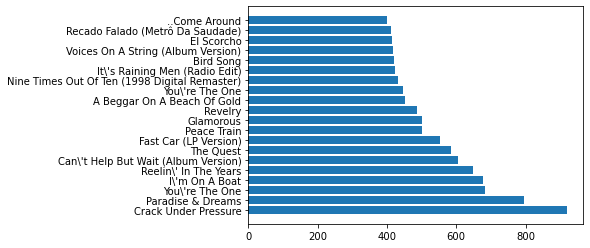

In [6]:
#song_data['song'].show()
# most listened time on ONE user
best_songs = song_data.sort_values('listen_count', ascending=False).head(20)
counter_labels = best_songs['title']
counts = best_songs['listen_count']
counter_pos = np.arange(20)
plt.barh(counter_pos, counts)
plt.yticks(counter_pos, counter_labels)
plt.show()

In [7]:
len(song_data)

1116609

## Đếm số lượng người dùng duy nhất trong tập dữ liệu

In [8]:
users = song_data['user_id'].unique()

In [9]:
len(users)

66346

<b>Quiz: Bài hát nào có nhiều người nghe nhất? Nhiều lượt nghe nhất? Ít lượt nghe nhất?<b>

In [13]:
song_count = {}
all_songs_id = list(song_data['song_id'])
for songid in all_songs_id:
    song_count[songid] = song_count.get(songid, 0) + 1

popular_song_id = max(song_count, key=song_count.get)
popular_song_id

'SOFRQTD12A81C233C0'

In [19]:
popular_song_name = song_data[song_data['song_id'] == popular_song_id]['title'].values[0]
print("Most popular song:", popular_song_name)
print("Number of people was played:", song_count[popular_song_id])

Most popular song: Sehr kosmisch
Number of people was played: 5970


In [22]:
print("Most listened song:", best_songs.head(1)['title'].values[0])
print("Less listened song:", best_songs.tail(1)['title'].values[0])

Most listened song: Crack Under Pressure
Less listened song: ..Come Around


# Tạo đề xuất bài hát

In [23]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(song_data, train_size=0.8, test_size=0.2, random_state=0)
print(len(train_data), len(test_data))
#train_data,test_data = song_data.random_split(.8,seed=0)

893287 223322


## Đề xuất đơn giản dựa trên độ phổ biến

In [24]:
popularity = pandas.DataFrame(song_data).groupby('song')['listen_count'].agg('sum').to_frame('total_listen_count') 
popularity = popularity.sort_values('total_listen_count', ascending=False)

### Sử dụng mô hình popularity để đưa ra các dự đoán

Mô hình popularity (phổ biến) đưa ra các dự đoán như nhau cho mọi người dùng, do đó cung cấp sự cá nhân hóa.

In [25]:
popularity.head(10)
#popularity_model.recommend(users=[users[0]])

,total_listen_count
song,
You\'re The One - Dwight Yoakam,40619
Undo - Björk,36059
Revelry - Kings Of Leon,30391
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner,21953
Sehr kosmisch - Harmonia,21646
Dog Days Are Over (Radio Edit) - Florence + The Machine,15889
Secrets - OneRepublic,14149
Ain\'t Misbehavin - Sam Cooke,14029
Invalid - Tub Ring,13701


In [ ]:
#popularity_model.recommend(users=[users[1]])

## Tạo đề xuất bài hát có tính cá nhân hóa

Bây giờ chúng ta sẽ tạo một mô hình giúp đưa ra các đề xuất mang tính cá nhân cho từng người dùng.

Các bạn cần bình tĩnh, ánh xạ song-to-user (bài hát tới người dùng) rất lớn nên việc tính độ tương tự rất tốn kém.

In [27]:
# Trước tiên, hãy tạo dữ liệu người nghe bài hát. Chúng ta có thể sử dụng đếm từ tùy chỉnh cho nhiệm vụ này. Đầu tiên, hãy nhóm dữ liệu theo bài hát
song_data_grouped = song_data.groupby("song")["user_id"].agg(lambda val: " ".join(val.values))

In [28]:
song_data_grouped

song
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version) - The Notorious B.I.G.    9236fe7fcb3905ea0daf49408f15a3c8b085b094 83ec2...
#40 - DAVE MATTHEWS BAND                                                                 b55d68f1a8759157038eb6688e5d6bb1b6336567 caa19...
& Down - Boys Noize                                                                      bab8d135cf88852063ed4a084dd24c783d7ff841 e22fc...
(Anaesthesia) Pulling Teath - Metallica                                                  8ee90038724c4957eb4df16f3e9c6ed2b570a3ec b963b...
(Antichrist Television Blues) - Arcade Fire                                              a7c4e5316026288c499a59ff03d8732d58206c92 ba230...
                                                                                                               ...                        
the Love Song - K-OS                                                                     ddd4fe98c55187b75bbcc3488cd485a27cb26099 da409...
you were there with me

In [29]:
# Giờ chúng ta sẽ chuyển các id bằng CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
values = CountVectorizer(max_features=1000).fit_transform(song_data_grouped.values)
dense_values = values.todense()
print(dense_values.shape)
# Tính độ tương tự sử dụng Jaccard 
from scipy.spatial.distance import cdist
similarity = cdist(dense_values, dense_values, 'jaccard')
print(similarity.shape)

(9952, 1000)
(9952, 9952)


In [30]:
# độ tương tự ở trên là 0 cho đối sánh tuyệt đối và 1 cho không đối sánh. Hãy sử dụng một bài hát ngẫu nhiên:
random_song = 2010
print("Random song name: {:s}".format(song_data_grouped.index[random_song]))
# nhận được bài hát tương tự nhất, ngoại trừ bài hát đầu tiên (vì rõ ràng nó là bài hát đầu tiên)
def retrieve_similar_items(song_id, values_kept=20):
    return np.argsort(similarity[song_id])[1:1+values_kept]
similar_10 = retrieve_similar_items(random_song, values_kept=10)
print("List of 10 similar songs:\n{}".format("\n".join((song_data_grouped.index[similar_10]))))

Random song name: Disco Heaven - Lady GaGa
List of 10 similar songs:
Hope For The Hopeless - A Fine Frenzy
The Medallion Calls - Klaus Badelt
They Do_ They Don\'t - Jack Johnson
Anything But Ordinary - Avril Lavigne
City Of The Dead - The Clash
FANTASY - Mariah Carey
That\'s How You Like It - Beyoncé feat. Jay-Z
Ain\'t Talkin\'  \'Bout Love (Remastered Version) - Van Halen
Amsterdam - Coldplay
Mediocre Bad Guys - Jack Johnson


In [31]:
# Bây giờ, chúng ta sẽ xây dựng đề xuất dựa trên độ tương tự của bài hát và lịch sử nghe của người dùng
song_lookup_dict = {name: i for i, name in enumerate(song_data_grouped.index)}
def congregate_song(row, values_kept=20):
    songs_data = similarity[row["song"]]
    song_and_listen = songs_data * np.expand_dims(row["listen_count"], axis=1)
    song_and_listen = np.argsort(np.sum(song_and_listen, axis=0))
    #print(song_and_listen.shape)
    if(values_kept is not None and values_kept != 0):
        return song_and_listen[:values_kept]
    else:
        return song_and_listen

def recommend(users, song_number=20):
    # filter the data
    users_data_id = song_data["user_id"].isin(users)
    users_data = song_data.loc[users_data_id].groupby("user_id")["song", "listen_count"].agg({
        "song": lambda x: np.vectorize(song_lookup_dict.get)(x.values).tolist(),
        "listen_count": lambda x: x.values.tolist()
    })
    users_data["recommend"] = users_data.apply(lambda x: congregate_song(x, values_kept=song_number), axis=1)
    return users_data

def show_songs_list(users_data):
    #users_data.reindex(columns=["song", "listen_count"])
    for row in users_data.iterrows():
        print("User {:s}'s recommended songs:'\n{:s}".format(
            row[0], 
            "\n".join( (song_data_grouped.index[song_id] for song_id in row[-1]["recommend"]))
        ))
#recommend(users[:2])

### Áp dụng mô hình được cá nhân hóa để đề xuất bài hát

Như bạn thấy, người dùng khác nhau sẽ nhận được những đề xuất khác nhau.

In [32]:
show_songs_list(recommend(users=[users[0]]))

User b80344d063b5ccb3212f76538f3d9e43d87dca9e's recommended songs:'
Moonshine - Jack Johnson
Behind The Sea [Live In Chicago] - Panic At The Disco
I\'ll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
I?\'m A Steady Rollin? Man - Robert Johnson
Por La Noche - Mala Rodriguez
Apuesta Por El Rock \'N\' Roll - Héroes del Silencio
Ya No Sos Igual - 2 Minutos
Bigger Isn\'t Better - The String Cheese Incident
The Cove - Jack Johnson
Constellations - Jack Johnson
Holes To Heaven - Jack Johnson
Héroe De Leyenda - Héroes del Silencio
Love Song For No One - John Mayer
People Watching - Jack Johnson
Ghost Dream - Hymie\'s Basement
Neon - John Mayer
Danse Pour Moi - M. Pokora
Flashdance... What A Feeling - Irene Cara
B.I.G. (Interlude)(Amended Version) - The Notorious B.I.G.
The Message/ Outro - Dr. Dre / Thomas Chong / Mary J. Blige / Rell


/Users/ngothai/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


In [33]:
show_songs_list(recommend(users=[users[1]]))

User 85c1f87fea955d09b4bec2e36aee110927aedf9a's recommended songs:'
The Best of Times - Sage Francis
Side To Side (Featuring Lateef & Pigeon John) (Album Version) - Blackalicious
Big Munny - Swizz Beatz
Southside - Common / Kanye West
It\'s Me B*#@hes - Swizz Beatz
You Know Your Boy Did That - Swizz Beatz
Work (Explicit) - Gang Starr
Diamonds From Sierra Leone - Kanye West / Jay-Z
Never Let Me Down - Kanye West / Jay-Z / J. Ivy
The Food - Common
Ringing Bells - Masta Killa
Bring The Noize - DMX
In Between The Years - Ulrich Schnauss
Down And Out (Album Version) - The Academy Is...
Mutha\'uckas (Album Version) - Flight Of The Conchords
The Choice Is Yours - Black Sheep
Maxine - Traveling Wilburys
Is She Weird - Pixies
Kick In The Door (Soundtrack Version) (Explicit) - Notorious B.I.G.
Beloved Kitty and the Piercing Bolts of Amor - Ordo Rosarius Equilibrio


/Users/ngothai/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


### Chúng ta có thể áp dụng mô hình để tìm bài hát tương tự với bất kỳ bài nào trong tập dữ liệu

In [34]:
u2_similar_index = retrieve_similar_items(song_lookup_dict['With Or Without You - U2'], values_kept=5)
print("List of 5 similar songs:\n{}".format("\n".join(song_data_grouped.index[u2_similar_index])))

List of 5 similar songs:
Decisiones - Ruben Blades
What I Want - Dead Or Alive
You Are A Knife - Veto
Dead Man (Carry Me) - Jars Of Clay
A Kind Of Hope - Pilot Speed


In [35]:
bvsc_similar_index = retrieve_similar_items(song_lookup_dict['Chan Chan (Live) - Buena Vista Social Club'], values_kept=5)
print("List of 20 similar songs:\n{}".format("\n".join(song_data_grouped.index[bvsc_similar_index])))

List of 20 similar songs:
Amor de Loca Juventud - Buena Vista Social Club
Murmullo - Buena Vista Social Club
Shaman\'s Blues ( LP Version ) - The Doors
Until The Morning - Thievery Corporation
La Bayamesa - Buena Vista Social Club


# So sánh định lượng giữa các mô hình

Bây giờ chúng ta sẽ chính thức so sánh các mô hình phổ biến và mô hình được cá nhân hóa bằng cách sử dụng các đường cong precision-recall. Điều này có thể tốn một chút thời gian. Trước hết, chúng ta cắt dữ liệu kiểm tra và tạo các hàm để kiểm tra xem liệu có thể sử dụng các mô hình của chúng ta để dự đoán các bài hát mà bất kỳ người dùng nào đã nghe không. 

In [36]:
# loại bỏ tất cả người dùng không có dữ liệu trong training set để đảm bảo
sample_test_data = test_data.loc[test_data["user_id"].isin(train_data["user_id"])]
sample_test_data = sample_test_data.groupby("user_id")["song"].agg(
        lambda x: np.vectorize(song_lookup_dict.get)(x.values).tolist() #x.values.tolist() 
    )
#print(sample_test_data.iloc[0])
def recommend_popularity(user):
    return np.vectorize(song_lookup_dict.get)(popularity.index.values).to_list()

def recommend_personalized(user, song_number=1000):
    return recommend([user], song_number=song_number)["recommend"].to_list()[0]

Bây giờ chúng ta hãy tính toán các giá trị Precision/Recall cho một mẫu gồm 1000 người dùng đầu tiên. Các bạn hãy kiên nhẫn khi thực hiện.

In [37]:
sample_test_data_frame = pandas.DataFrame(data=sample_test_data[:1000])
sample_test_data_frame["rec_personalized"] = sample_test_data_frame.index.to_series().apply(recommend_personalized)
print("Done calculation for general recommendation.")
#print(type(sample_test_data))
sample_test_data_frame.head()

/Users/ngothai/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


Done calculation for general recommendation.


,song,rec_personalized
user_id,,
00003a4459f33b92906be11abe0e93efc423c0ff,"[4831, 6139]","[2051, 9201, 5948, 9862, 7718, 4831, 4, 769, 2..."
00030033e3a2f904a48ec1dd53019c9969b6ef1f,[1139],"[7110, 1436, 9873, 4402, 47, 7122, 2062, 9077,..."
0007235c769e610e3d339a17818a5708e41008d9,[3006],"[3006, 7858, 5469, 183, 1998, 9829, 9338, 3308..."
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,[8159],"[8170, 9825, 3256, 4225, 3340, 8159, 2087, 522..."
000a5c8b4d8b2c98f7a205219181d039edcd4506,"[7743, 309, 8374]","[8374, 1996, 959, 7743, 9345, 309, 5779, 4568,..."


<b>Tùy chọn: Chúng ta có thể tối ưu hóa quy trình này không?<b>
Hãy nhớ lại rằng hàm recommend() có thể nhận (danh sách/chuỗi) người dùng có thể lặp lại. Chúng ta có thể sử dụng ánh xạ tốt hơn cho rec_personalized không? Và nó có nhanh hơn không?

In [38]:
popularity_data, personalized_data = [], []
def count_correct(songs, recs):
    return sum( (1 if song in recs else 0 for song in songs) )
    
for num_recommend in np.arange(100, 10, -10):
    #num_recommend = int(float(len(popularity)) * p)
    popularity_recommendation = np.vectorize(song_lookup_dict.get)(popularity.index.values)[:num_recommend]
    popular_fn = lambda row: (count_correct(row["song"], popularity_recommendation), len(row["song"]), num_recommend)
    precision_recall_popularity = sample_test_data_frame.apply(popular_fn, axis=1, result_type='reduce')
    correct, all_entry, all_guesses = (float(sum(x)) for x in zip(*precision_recall_popularity))
    precision = correct / all_entry
    recall = correct / all_guesses
    popularity_data.append( (precision, recall) )
    print("Popularity: precision: {:.4f}, recall: {:.4f}, {}-{}-{}".format(precision * 100.0, recall * 100.0, correct, all_entry, all_guesses))
    sample_test_data_frame["rec_personalized"] = sample_test_data_frame["rec_personalized"].apply(lambda row: row[:num_recommend])
    precision_recall_personalized = sample_test_data_frame.apply(lambda row: (count_correct(row["song"], row["rec_personalized"]), len(row["song"]), num_recommend), axis=1, result_type='reduce')
    correct, all_entry, all_guesses = (float(sum(x)) for x in zip(*precision_recall_personalized))
    precision = correct / all_entry
    recall = correct / all_guesses
    personalized_data.append( (precision, recall) )
    print("Personalized: precision: {:.4f}, recall: {:.4f}, {}-{}-{}".format(precision * 100.0, recall * 100.0, correct, all_entry, all_guesses))
    
popularity_data.append((0.0, 1.0))
personalized_data.append((0.0, 1.0))

Popularity: precision: 13.2090, recall: 0.5100, 510.0-3861.0-100000.0
Personalized: precision: 67.5214, recall: 2.6070, 2607.0-3861.0-100000.0
Popularity: precision: 12.5874, recall: 0.5400, 486.0-3861.0-90000.0
Personalized: precision: 66.5890, recall: 2.8567, 2571.0-3861.0-90000.0
Popularity: precision: 11.5773, recall: 0.5587, 447.0-3861.0-80000.0
Personalized: precision: 65.1645, recall: 3.1450, 2516.0-3861.0-80000.0
Popularity: precision: 10.7226, recall: 0.5914, 414.0-3861.0-70000.0
Personalized: precision: 63.4810, recall: 3.5014, 2451.0-3861.0-70000.0
Popularity: precision: 9.8938, recall: 0.6367, 382.0-3861.0-60000.0
Personalized: precision: 61.9529, recall: 3.9867, 2392.0-3861.0-60000.0
Popularity: precision: 8.8319, recall: 0.6820, 341.0-3861.0-50000.0
Personalized: precision: 59.5183, recall: 4.5960, 2298.0-3861.0-50000.0
Popularity: precision: 7.6664, recall: 0.7400, 296.0-3861.0-40000.0
Personalized: precision: 55.7369, recall: 5.3800, 2152.0-3861.0-40000.0
Popularity: pr

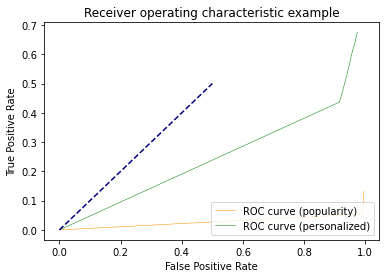

In [39]:
lw=0.5
plt.figure()
popularity_precisions, popularity_recall = zip(*popularity_data)
plt.plot([1.0 - r for r in popularity_recall], list(popularity_precisions), color='darkorange',
         lw=lw, label='ROC curve (popularity)')
personal_precisions, personal_recall= zip(*personalized_data)
plt.plot([1.0 - r for r in personal_recall], list(personal_precisions), color='green',
         lw=lw, label='ROC curve (personalized)')
plt.plot([0.0, 0.5], [0.0, 0.5], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Đường cong cho thấy mô hình được cá nhân hóa cho hiệu suất tốt hơn nhiều, vì độ chính xác tăng lên không ngừng khi chúng ta gia tăng số lượng đề xuất.